Object Detection Goggles Training Code 
team:
Shereen Mabrouk
Alaa Hossam
Abdelrahman Sewelam
Hazem AbdelSalam
Ahmed Ashraf
Hend Khaled Aly


In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/finaldataset/Dataset_new_all/data.yaml
/kaggle/input/finaldataset/Dataset_new_all/test/labels/green_263_jpg.rf.bff855f6fa3bb6194119d67065c2996e.txt
/kaggle/input/finaldataset/Dataset_new_all/test/labels/loserfiles7531_jpg.rf.c71e8a7efd67a1a4f28745ae29d57314.txt
/kaggle/input/finaldataset/Dataset_new_all/test/labels/loserfiles7345_jpg.rf.ae9296e84372d5c2c92a87b5bdd769ad.txt
/kaggle/input/finaldataset/Dataset_new_all/test/labels/loserfiles7223_jpg.rf.4c04b199ab9d6323198ed136cf334b61.txt
/kaggle/input/finaldataset/Dataset_new_all/test/labels/loserfiles7626_jpg.rf.d59454c8039dc3062bb305efffe6404d.txt
/kaggle/input/finaldataset/Dataset_new_all/test/labels/loserfiles7379_jpg.rf.b294c0bde9f731067e9713920577a5c2.txt
/kaggle/input/finaldataset/Dataset_new_all/test/labels/loserfiles7466_jpg.rf.f74073a995900281611455da9779780f.txt
/kaggle/input/finaldataset/Dataset_new_all/test/labels/loserfiles7556_jpg.rf.ba943e9ac8743f27131aedc77134f220.txt
/kaggle/input/finaldataset/Dataset_new_a

In [2]:
import os
import matplotlib.pyplot as plt
import cv2
import shutil
import numpy as np 
import pandas as pd 
import datetime
from pathlib import Path
from collections import Counter
import yaml
from sklearn.model_selection import KFold
import glob
from PIL import Image

In [3]:
# Define a mapping of class numbers to their names
class_names = {
    0: 'Autorickshaw',
    1: 'Barricades',
    2: 'Bench',
    3: 'crosswalk',
    4: 'fire-hydrant',
    5: 'garbage',
    6: 'garbage box',
    7: 'pothole',
    8: 'stairs',
    9: 'stray animal',
    10: 'green_light',
    11: 'red_light',
    12: 'vehicles'
}

In [4]:
def count_class_train(label_folder_train):
    class_counts = {class_number: 0 for class_number in range(13)}
    if os.path.exists(label_folder_train):
        os.chdir(label_folder_train)
        for label_file in os.listdir(label_folder_train):
            label_file_path =  label_file
            #label_file_path = label_file_path.replace('\\','/')
            with open(label_file_path, 'r') as file:
                lines = file.readlines()
                for line in lines:
                    class_number = int(line.split()[0])
                    class_counts[class_number] += 1
    else:
        print('directory not found')
    return class_counts

dump="/kaggle/input/finaldataset/Dataset_new_all/train/labels"
train_class_occurrences = count_class_train(dump)

for class_number, occurrence in train_class_occurrences.items():
    class_name = class_names.get(class_number)
    print(f'Class {class_name} ({class_number}) : {occurrence}')

Class Autorickshaw (0) : 2354
Class Barricades (1) : 2782
Class Bench (2) : 1292
Class crosswalk (3) : 1898
Class fire-hydrant (4) : 766
Class garbage (5) : 1616
Class garbage box (6) : 1734
Class pothole (7) : 1662
Class stairs (8) : 1602
Class stray animal (9) : 2221
Class green_light (10) : 1118
Class red_light (11) : 1042
Class vehicles (12) : 1672


In [5]:
def count_class_test(label_folder_test):
    class_counts = {class_number: 0 for class_number in range(13)}
    if os.path.exists(label_folder_test):
        os.chdir(label_folder_test)
        for label_file in os.listdir(label_folder_test):
            label_file_path = label_file
            with open(label_file_path, 'r') as file:
                lines = file.readlines()
                for line in lines:
                    class_number = int(line.split()[0])
                    class_counts[class_number] += 1
    else:
        print("directory not found")

    return class_counts

dump2='/kaggle/input/finaldataset/Dataset_new_all/test/labels'
test_class_occurrences = count_class_test(dump2)

for class_number, occurrence in test_class_occurrences.items():
    class_name = class_names.get(class_number)
    print(f'Class {class_name} ({class_number}) : {occurrence}')

Class Autorickshaw (0) : 118
Class Barricades (1) : 86
Class Bench (2) : 104
Class crosswalk (3) : 80
Class fire-hydrant (4) : 82
Class garbage (5) : 147
Class garbage box (6) : 107
Class pothole (7) : 90
Class stairs (8) : 81
Class stray animal (9) : 111
Class green_light (10) : 102
Class red_light (11) : 40
Class vehicles (12) : 86


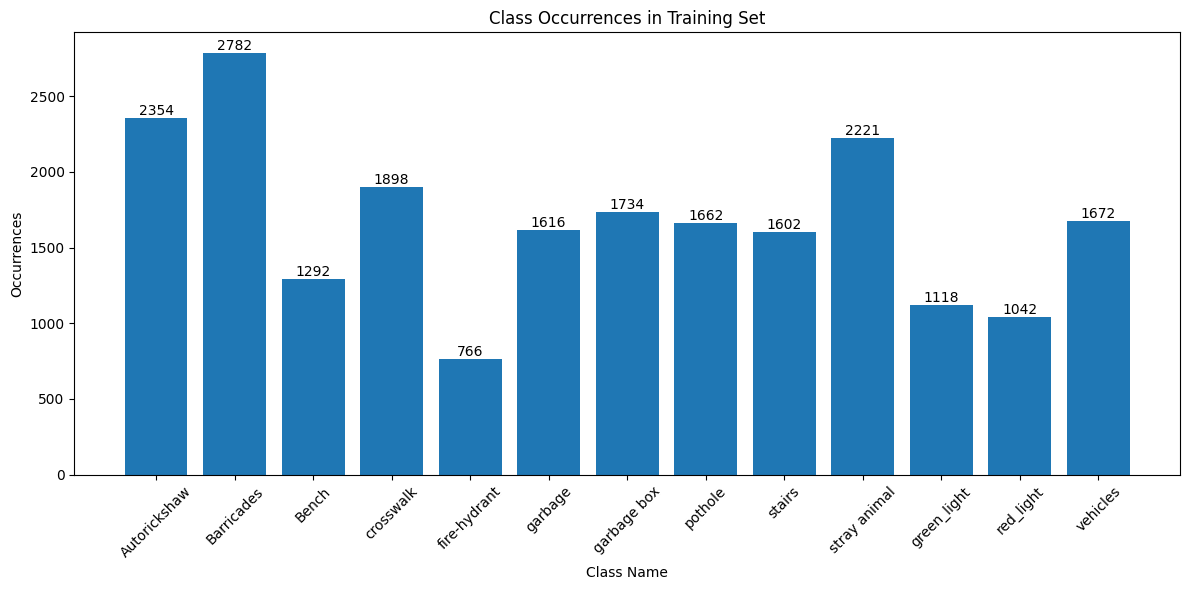

In [6]:
# Create a bar chart to visualize the class occurrences
classes = list(train_class_occurrences.keys())
counts = list(train_class_occurrences.values())

# Map class numbers to their names for labeling the x-axis
class_labels = [class_names.get(class_number, 'Unknown') for class_number in classes]

# Increase figure size for better readability
plt.figure(figsize=(12, 6))

# Create the bar chart with integer values for occurrences
plt.bar(class_labels, counts)
plt.xlabel('Class Name')
plt.ylabel('Occurrences')
plt.title('Class Occurrences in Training Set')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)
plt.tight_layout()

# Display integer values on top of each bar
for i, v in enumerate(counts):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()

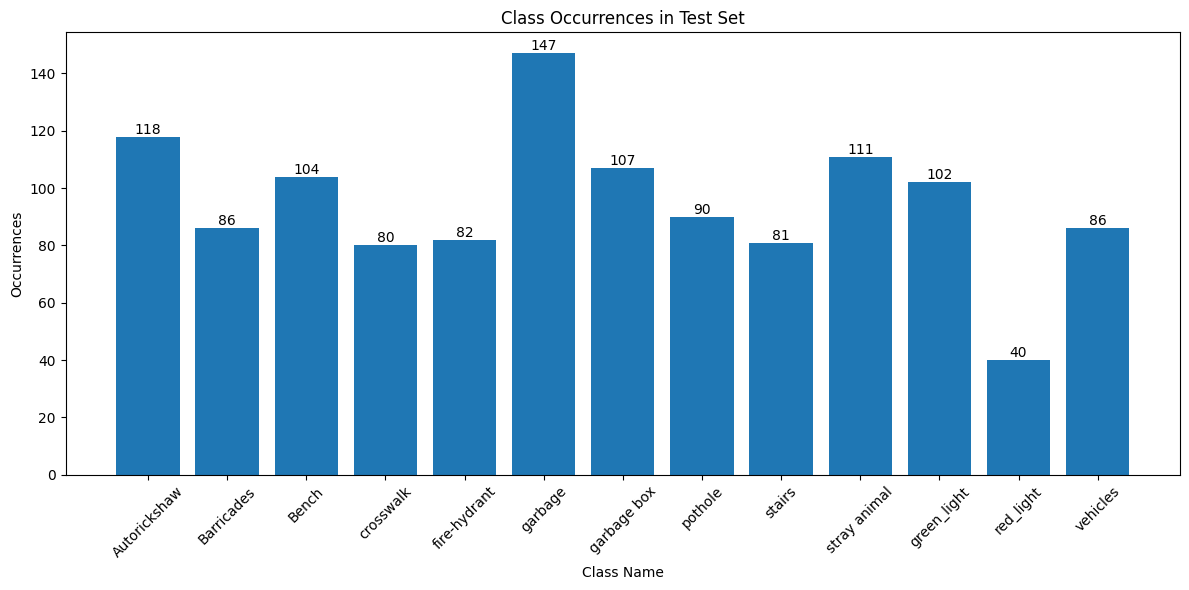

In [7]:
# Create a bar chart to visualize the class occurrences
classes = list(test_class_occurrences.keys())
counts = list(test_class_occurrences.values())

# Map class numbers to their names for labeling the x-axis
class_labels = [class_names.get(class_number, 'Unknown') for class_number in classes]

# Increase figure size for better readability
plt.figure(figsize=(12, 6))

# Create the bar chart with integer values for occurrences
plt.bar(class_labels, counts)
plt.xlabel('Class Name')
plt.ylabel('Occurrences')
plt.title('Class Occurrences in Test Set')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)
plt.tight_layout()

# Display integer values on top of each bar
for i, v in enumerate(counts):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()

In [8]:
TARGET_IMAGES_PATH = '/kaggle/working/detection/full_dataset/images/'
TARGET_LABELS_PATH = '/kaggle/working/detection/full_dataset/labels/'

source_folder_path = "/kaggle/input/finaldataset/Dataset_new_all/{split}/{type}"
splits = ["train"]
types = ["images/*.jpg", "labels/*.txt"]

os.makedirs(TARGET_IMAGES_PATH, exist_ok=True)
os.makedirs(TARGET_LABELS_PATH, exist_ok=True)

image_paths = list()
label_paths = list()

for split in splits:
    for data_type in types:
        files = glob.glob(source_folder_path.format(split=split, type=data_type))
        for file_ in files:
            if "image" in data_type:
                shutil.copy(file_, TARGET_IMAGES_PATH)
            else:
                shutil.copy(file_, TARGET_LABELS_PATH)

# Store image and label paths for future use
image_paths = glob.glob(TARGET_IMAGES_PATH + "*.jpg")
label_paths = glob.glob(TARGET_LABELS_PATH + "*.txt")

In [9]:
dataset_path = Path('/kaggle/working/detection/full_dataset/') # replace with 'path/to/dataset' for your custom data
labels = sorted(dataset_path.rglob("*labels/*.txt")) # all data in 'labels'

In [10]:
import yaml

yaml_file = '/kaggle/input/finaldataset/Dataset_new_all/data.yaml'  # your data YAML with data directories and names list
with open(yaml_file, 'r', encoding="utf8") as y:
    data = yaml.safe_load(y)

# Assuming 'names' is a list of strings
classes = data.get('names', [])#############was sorted############
cls_idx = {index: name for index, name in enumerate(classes[:13])}
print(cls_idx)
print(classes)

{0: 'Autorickshaws', 1: 'Bench', 2: 'Crosswalk', 3: 'Firehydrant', 4: 'Person', 5: 'Barricade', 6: 'Garbage box', 7: 'Pothole', 8: 'Stairs', 9: 'Stray animal', 10: 'green_light', 11: 'red_light', 12: 'vehicles'}
['Autorickshaws', 'Bench', 'Crosswalk', 'Firehydrant', 'Person', 'Barricade', 'Garbage box', 'Pothole', 'Stairs', 'Stray animal', 'green_light', 'red_light', 'vehicles']


In [11]:
indx = [l.stem for l in labels] # uses base filename as ID (no extension)
labels_df = pd.DataFrame([], columns=cls_idx, index=indx)

In [12]:
for label in labels:
    lbl_counter = Counter()

    with open(label,'r') as lf:
        lines = lf.readlines()

    for l in lines:
        # classes for YOLO label uses integer at first position of each line
        lbl_counter[int(l.split(' ')[0])] += 1

    labels_df.loc[label.stem] = lbl_counter

labels_df = labels_df.fillna(0.0) # replace `nan` values with `0.0`

/tmp/ipykernel_34/2598033761.py:13: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  labels_df = labels_df.fillna(0.0) # replace `nan` values with `0.0`


In [13]:
!pip install iterative-stratification
from iterstrat.ml_stratifiers import MultilabelStratifiedKFold

In [14]:
data = labels_df.iloc[:, 0:].values

our_labels = (data > 0).astype(int)

ksplit = 5

mskf = MultilabelStratifiedKFold(n_splits=ksplit, shuffle=True, random_state=42)
kfolds = mskf.split(data, our_labels)

In [15]:
folds = [f'split_{n}' for n in range(1, ksplit + 1)]
folds_df = pd.DataFrame(index=indx, columns=folds)

for idx, (train, val) in enumerate(kfolds, start=1):
    folds_df[f'split_{idx}'].loc[labels_df.iloc[train].index] = 'train'
    folds_df[f'split_{idx}'].loc[labels_df.iloc[val].index] = 'val'

/tmp/ipykernel_34/3825890032.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  folds_df[f'split_{idx}'].loc[labels_df.iloc[train].index] = 'train'
/tmp/ipykernel_34/3825890032.py:6: FutureWarning: ChainedAssignmentError: behaviour will cha

In [16]:
fold_ratios_list = []

# Iterate over each fold
for fold, (train_idx, val_idx) in enumerate(mskf.split(data, our_labels)):
    train_labels = our_labels[train_idx]
    val_labels = our_labels[val_idx]
    fold_ratios = {'Fold': fold + 1}
    for i in range(our_labels.shape[1]):
        train_count = np.sum(train_labels[:, i])
        val_count = np.sum(val_labels[:, i])

        # Compute the ratio
        ratio = val_count / train_count if val_count > 0 else np.nan  # Using NaN for undefined ratios
        fold_ratios[f'Class_{i}_Ratio'] = ratio

    # Add ratios for this fold to the list
    fold_ratios_list.append(fold_ratios)

# Create a DataFrame from the list
ratios_df = pd.DataFrame(fold_ratios_list)

In [17]:
supported_extensions = ['.jpg', '.jpeg', '.png']

# Initialize an empty list to store image file paths
images = []

# Loop through supported extensions and gather image files
for ext in supported_extensions:
    images.extend(sorted((dataset_path / 'images').rglob(f"*{ext}")))

# Create the necessary directories and dataset YAML files (unchanged)
save_path = Path(dataset_path / f'{datetime.date.today().isoformat()}_{ksplit}-Fold_Cross-val')
save_path.mkdir(parents=True, exist_ok=True)
ds_yamls = []

for split in folds_df.columns:
    # Create directories
    split_dir = save_path / split
    split_dir.mkdir(parents=True, exist_ok=True)
    (split_dir / 'train' / 'images').mkdir(parents=True, exist_ok=True)
    (split_dir / 'train' / 'labels').mkdir(parents=True, exist_ok=True)
    (split_dir / 'val' / 'images').mkdir(parents=True, exist_ok=True)
    (split_dir / 'val' / 'labels').mkdir(parents=True, exist_ok=True)

    # Create dataset YAML files
    dataset_yaml = split_dir / f'{split}_dataset.yaml'
    ds_yamls.append(dataset_yaml)

    with open(dataset_yaml, 'w') as ds_y:
        yaml.safe_dump({
            'path': split_dir.as_posix(),
            'train': 'train',
            'val': 'val',
            'names': classes
        }, ds_y)

In [18]:
for image, label in zip(images, labels):
    for split, k_split in folds_df.loc[image.stem].items():
        # Destination directory
        img_to_path = save_path / split / k_split / 'images'
        lbl_to_path = save_path / split / k_split / 'labels'

        # Copy image and label files to new directory (SamefileError if file already exists)
        shutil.copy(image, img_to_path / image.name)
        shutil.copy(label, lbl_to_path / label.name)

In [20]:
PATH1 = '/kaggle/working/detection/full_dataset/2024-03-14_5-Fold_Cross-val/split_3'
os.listdir(PATH1)

['train', 'split_3_dataset.yaml', 'val']

In [21]:
file_path = '/kaggle/working/detection/full_dataset/2024-03-14_5-Fold_Cross-val/split_3/split_3_dataset.yaml'  # Replace with the actual path to your file

try:
    with open(file_path, 'r', encoding='utf-8') as file:
        file_contents = file.read()
        print(file_contents)
except FileNotFoundError:
    print(f"File '{file_path}' not found.")
except Exception as e:
    print(f"An error occurred: {e}")

names:
- Autorickshaws
- Bench
- Crosswalk
- Firehydrant
- Person
- Barricade
- Garbage box
- Pothole
- Stairs
- Stray animal
- green_light
- red_light
- vehicles
path: /kaggle/working/detection/full_dataset/2024-03-14_5-Fold_Cross-val/split_3
train: train
val: val



In [22]:
import os
from collections import Counter

folder_path = '/kaggle/working/detection/full_dataset/2024-03-14_5-Fold_Cross-val/split_3/train/images'

# Get a list of all files in the folder
files = os.listdir(folder_path)

# Extract file extensions and count occurrences
file_extensions = [os.path.splitext(file)[1] for file in files]
extension_counts = Counter(file_extensions)

# Print the file formats and their counts
print("File Formats and their counts:")
for extension, count in extension_counts.items():
    print(f"{extension}: {count}")


File Formats and their counts:
.jpg: 13727


In [23]:
folds_df.to_csv(save_path / "kfold_datasplit.csv")
#ask about that folder
#fold_lbl_distrb.to_csv(save_path / "kfold_label_distribution.csv")

In [24]:
pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 721.2/721.2 kB 31.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [25]:
from ultralytics import YOLO, checks, hub
checks()  # checks

Ultralytics YOLOv8.1.27 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5518.9/8062.4 GB disk)


In [26]:
os.chdir("/kaggle/working/")

In [27]:
models = YOLO("yolov8n.pt")

100%|██████████| 6.23M/6.23M [00:00<00:00, 240MB/s]


In [28]:
import os
import shutil

# Define the source and destination paths
source_path = '/kaggle/input/finaldataset/Dataset_new_all'
destination_path = '/kaggle/working/'

# Create the destination directory if it doesn't exist
if not os.path.exists(destination_path):
    os.makedirs(destination_path)

# Copy the directories (train and test) and data.yaml
for item in os.listdir(source_path):
    source_item = os.path.join(source_path, item)
    destination_item = os.path.join(destination_path, item)

    if os.path.isdir(source_item):
        # Copy entire subdirectory
        shutil.copytree(source_item, destination_item)
    else:
        # Copy file (e.g., data.yaml)
        shutil.copy2(source_item, destination_item)

print("Dataset copied successfully.")

Dataset copied successfully.


In [29]:
os.chdir("/kaggle/working/")
#hub.login('fa8f8014c4c2c475e025f962f622f0c2e79149cfb4')  # use your API key
#model = YOLO('yolov8n.yaml')  # Build a model from scratch
results = models.train(data="/kaggle/working/detection/full_dataset/2024-03-14_5-Fold_Cross-val/split_3/split_3_dataset.yaml",epochs=100)  # train model

Ultralytics YOLOv8.1.27 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/kaggle/working/detection/full_dataset/2024-03-14_5-Fold_Cross-val/split_3/split_3_dataset.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=Fals

100%|██████████| 755k/755k [00:00<00:00, 67.4MB/s]
2024-03-14 22:18:43,842	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-03-14 22:18:44,680	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-03-14 22:18:47.120360: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-14 22:18:47.120484: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-14 22:18:47.270967: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS facto

Overriding model.yaml nc=80 with nc=13

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

train: Scanning /kaggle/working/detection/full_dataset/2024-03-14_5-Fold_Cross-val/split_3/train/labels... 13727 images, 0 backgrounds, 0 corrupt: 100%|██████████| 13727/13727 [00:10<00:00, 1260.13it/s]


train: New cache created: /kaggle/working/detection/full_dataset/2024-03-14_5-Fold_Cross-val/split_3/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 217, len(boxes) = 17399. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/working/detection/full_dataset/2024-03-14_5-Fold_Cross-val/split_3/val/labels... 3434 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3434/3434 [00:02<00:00, 1255.11it/s]


val: New cache created: /kaggle/working/detection/full_dataset/2024-03-14_5-Fold_Cross-val/split_3/val/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 45, len(boxes) = 4360. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100       2.4G      1.252      3.264       1.54         43        640: 100%|██████████| 858/858 [02:49<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:23<00:00,  4.57it/s]


                   all       3434       4360      0.494      0.483       0.49      0.271

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.41G      1.311      2.388      1.568         47        640: 100%|██████████| 858/858 [02:41<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:21<00:00,  5.12it/s]


                   all       3434       4360      0.521      0.446      0.449      0.228

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100       2.4G      1.405      2.296      1.643         42        640: 100%|██████████| 858/858 [02:38<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:21<00:00,  5.11it/s]


                   all       3434       4360      0.528       0.38      0.386       0.18

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100       2.4G      1.476      2.227      1.706         37        640: 100%|██████████| 858/858 [02:37<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:20<00:00,  5.16it/s]


                   all       3434       4360      0.575      0.457      0.455      0.227

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.39G      1.423      2.007      1.661         33        640: 100%|██████████| 858/858 [02:37<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:20<00:00,  5.21it/s]


                   all       3434       4360      0.621      0.505      0.534      0.285

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.39G      1.373      1.833      1.619         27        640: 100%|██████████| 858/858 [02:37<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:20<00:00,  5.14it/s]


                   all       3434       4360      0.651      0.575      0.605      0.335

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.39G      1.344      1.707      1.594         46        640: 100%|██████████| 858/858 [02:38<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:20<00:00,  5.23it/s]


                   all       3434       4360      0.675      0.577      0.634      0.349

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.39G      1.316      1.629      1.575         40        640: 100%|██████████| 858/858 [02:37<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:20<00:00,  5.18it/s]


                   all       3434       4360      0.657      0.624      0.654      0.383

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.39G      1.294      1.565      1.554         43        640: 100%|██████████| 858/858 [02:37<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:20<00:00,  5.18it/s]


                   all       3434       4360      0.646      0.637       0.66      0.384

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.38G      1.276      1.506      1.546         47        640: 100%|██████████| 858/858 [02:37<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:20<00:00,  5.18it/s]


                   all       3434       4360      0.636      0.643      0.671      0.397

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.39G      1.254      1.457      1.524         38        640: 100%|██████████| 858/858 [02:37<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:21<00:00,  5.10it/s]


                   all       3434       4360      0.712      0.666      0.718      0.427

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.38G      1.238      1.426      1.509         44        640: 100%|██████████| 858/858 [02:37<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:20<00:00,  5.19it/s]


                   all       3434       4360      0.712      0.673      0.721      0.439

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.38G      1.225      1.395      1.501         36        640: 100%|██████████| 858/858 [02:37<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:20<00:00,  5.16it/s]


                   all       3434       4360      0.698      0.685      0.725      0.446

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.38G      1.219      1.352      1.485         37        640: 100%|██████████| 858/858 [02:37<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:20<00:00,  5.23it/s]


                   all       3434       4360      0.739      0.678      0.739      0.456

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.38G      1.198      1.317      1.477         35        640: 100%|██████████| 858/858 [02:37<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:20<00:00,  5.28it/s]

                   all       3434       4360      0.767      0.688      0.744      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.38G      1.193      1.294      1.467         36        640: 100%|██████████| 858/858 [02:37<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:20<00:00,  5.16it/s]


                   all       3434       4360       0.72      0.701      0.743      0.464

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.38G       1.19       1.28      1.471         49        640: 100%|██████████| 858/858 [02:37<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:20<00:00,  5.20it/s]


                   all       3434       4360      0.762      0.715      0.757      0.475

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.38G       1.18       1.26      1.456         34        640: 100%|██████████| 858/858 [02:38<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:21<00:00,  5.02it/s]


                   all       3434       4360      0.768      0.715      0.768      0.484

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.38G      1.162      1.241      1.448         43        640: 100%|██████████| 858/858 [02:38<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:21<00:00,  5.08it/s]


                   all       3434       4360      0.743      0.736      0.776      0.495

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.38G       1.16      1.224      1.441         35        640: 100%|██████████| 858/858 [02:39<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:21<00:00,  5.13it/s]

                   all       3434       4360      0.735      0.724      0.767      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.38G      1.152      1.192      1.433         37        640: 100%|██████████| 858/858 [02:38<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:21<00:00,  5.12it/s]

                   all       3434       4360      0.772       0.72      0.783      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.38G      1.138      1.174      1.424         38        640: 100%|██████████| 858/858 [02:39<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:20<00:00,  5.17it/s]


                   all       3434       4360      0.778       0.73      0.794      0.515

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.38G      1.136      1.166      1.428         41        640: 100%|██████████| 858/858 [02:39<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:20<00:00,  5.16it/s]


                   all       3434       4360      0.778      0.744       0.79       0.51

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.38G      1.121      1.156      1.417         52        640: 100%|██████████| 858/858 [02:39<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:21<00:00,  5.03it/s]


                   all       3434       4360      0.771      0.761      0.795      0.524

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.38G      1.128      1.138      1.416         35        640: 100%|██████████| 858/858 [02:40<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:20<00:00,  5.22it/s]

                   all       3434       4360      0.805      0.744      0.808      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.38G      1.116      1.123      1.411         46        640: 100%|██████████| 858/858 [02:37<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:20<00:00,  5.24it/s]

                   all       3434       4360       0.78      0.763      0.804      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.38G      1.112       1.11      1.405         33        640: 100%|██████████| 858/858 [02:38<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:21<00:00,  5.09it/s]

                   all       3434       4360      0.796       0.75      0.811      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.38G      1.108      1.107      1.402         44        640: 100%|██████████| 858/858 [02:38<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:20<00:00,  5.14it/s]

                   all       3434       4360      0.787      0.766      0.817       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.38G      1.102      1.089      1.395         50        640: 100%|██████████| 858/858 [02:38<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:21<00:00,  5.14it/s]

                   all       3434       4360       0.79      0.764      0.811       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.38G      1.096      1.079      1.391         30        640: 100%|██████████| 858/858 [02:38<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:21<00:00,  5.13it/s]

                   all       3434       4360      0.787      0.773      0.817      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.38G       1.09      1.065      1.387         48        640: 100%|██████████| 858/858 [02:38<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:20<00:00,  5.17it/s]

                   all       3434       4360      0.815      0.776      0.831      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.38G      1.088      1.057      1.387         37        640: 100%|██████████| 858/858 [02:38<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:21<00:00,  5.11it/s]

                   all       3434       4360       0.79      0.786      0.827      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.38G      1.081      1.037      1.379         50        640: 100%|██████████| 858/858 [02:38<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:20<00:00,  5.21it/s]

                   all       3434       4360      0.789      0.784      0.828      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.38G       1.07      1.037      1.376         51        640: 100%|██████████| 858/858 [02:38<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:20<00:00,  5.17it/s]

                   all       3434       4360      0.789      0.794      0.832      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.38G      1.077      1.036      1.374         43        640: 100%|██████████| 858/858 [02:38<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:20<00:00,  5.17it/s]

                   all       3434       4360      0.805      0.781      0.835      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.38G      1.063      1.014      1.364         46        640: 100%|██████████| 858/858 [02:38<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:20<00:00,  5.22it/s]

                   all       3434       4360      0.804      0.792      0.835      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.38G      1.063      1.011      1.367         30        640: 100%|██████████| 858/858 [02:38<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:21<00:00,  5.13it/s]

                   all       3434       4360      0.797      0.802      0.839      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      2.38G      1.057      1.002      1.361         45        640: 100%|██████████| 858/858 [02:38<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:21<00:00,  5.12it/s]

                   all       3434       4360      0.801      0.795      0.841      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.38G      1.058     0.9952      1.357         33        640: 100%|██████████| 858/858 [02:39<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:20<00:00,  5.20it/s]

                   all       3434       4360      0.814      0.794      0.844      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      2.38G      1.047      0.975      1.353         38        640: 100%|██████████| 858/858 [02:38<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:20<00:00,  5.20it/s]

                   all       3434       4360      0.822       0.79      0.846      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      2.38G      1.045     0.9848      1.351         42        640: 100%|██████████| 858/858 [02:37<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:20<00:00,  5.23it/s]

                   all       3434       4360      0.815      0.802      0.852      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      2.38G      1.046     0.9729      1.349         42        640: 100%|██████████| 858/858 [02:38<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:21<00:00,  5.13it/s]

                   all       3434       4360      0.812      0.805       0.85      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.38G      1.037     0.9668      1.345         30        640: 100%|██████████| 858/858 [02:38<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:21<00:00,  5.14it/s]

                   all       3434       4360       0.81      0.807      0.851      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.38G      1.031     0.9517      1.339         35        640: 100%|██████████| 858/858 [02:38<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:20<00:00,  5.29it/s]

                   all       3434       4360      0.817      0.811      0.851      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.38G       1.03     0.9494      1.339         35        640: 100%|██████████| 858/858 [02:38<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:20<00:00,  5.20it/s]

                   all       3434       4360      0.822      0.806      0.851      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      2.38G       1.03     0.9455      1.336         26        640: 100%|██████████| 858/858 [02:38<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:20<00:00,  5.26it/s]

                   all       3434       4360      0.817      0.809      0.851      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      2.38G      1.022     0.9359      1.334         27        640: 100%|██████████| 858/858 [02:37<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:20<00:00,  5.21it/s]

                   all       3434       4360      0.822      0.817      0.857      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.38G      1.014     0.9258      1.331         43        640: 100%|██████████| 858/858 [02:37<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:20<00:00,  5.20it/s]

                   all       3434       4360      0.827      0.813      0.858      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      2.38G      1.014     0.9251      1.324         28        640: 100%|██████████| 858/858 [02:37<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:20<00:00,  5.23it/s]

                   all       3434       4360      0.837       0.81      0.858      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      2.38G      1.009     0.9113      1.321         36        640: 100%|██████████| 858/858 [02:37<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:21<00:00,  5.11it/s]

                   all       3434       4360      0.827      0.811      0.859      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      2.38G      1.008     0.9031      1.318         42        640: 100%|██████████| 858/858 [02:38<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:20<00:00,  5.21it/s]

                   all       3434       4360       0.84      0.811      0.863        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      2.38G     0.9944     0.8952      1.311         34        640: 100%|██████████| 858/858 [02:37<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:20<00:00,  5.25it/s]

                   all       3434       4360      0.828      0.822      0.864      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.38G      1.001     0.8975       1.32         30        640: 100%|██████████| 858/858 [02:37<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:20<00:00,  5.20it/s]

                   all       3434       4360      0.842      0.814      0.864      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.38G      1.001     0.8925      1.316         38        640: 100%|██████████| 858/858 [02:38<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:20<00:00,  5.31it/s]

                   all       3434       4360      0.824      0.828      0.862      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.38G     0.9868     0.8792      1.309         36        640: 100%|██████████| 858/858 [02:37<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:20<00:00,  5.22it/s]

                   all       3434       4360      0.826       0.82      0.861      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.38G     0.9885     0.8753      1.306         34        640: 100%|██████████| 858/858 [02:37<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:20<00:00,  5.26it/s]

                   all       3434       4360      0.833       0.82      0.865      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      2.38G     0.9851     0.8742      1.299         29        640: 100%|██████████| 858/858 [02:37<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:20<00:00,  5.16it/s]

                   all       3434       4360      0.839      0.821      0.866      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      2.38G     0.9763     0.8591      1.296         45        640: 100%|██████████| 858/858 [02:39<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:20<00:00,  5.19it/s]

                   all       3434       4360      0.853       0.82      0.868      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      2.38G     0.9768     0.8525      1.302         43        640: 100%|██████████| 858/858 [02:38<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:20<00:00,  5.21it/s]

                   all       3434       4360      0.853      0.815      0.868      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      2.38G     0.9697     0.8565      1.294         30        640: 100%|██████████| 858/858 [02:39<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:21<00:00,  5.09it/s]

                   all       3434       4360      0.848      0.819       0.87       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.38G     0.9605     0.8403      1.289         35        640: 100%|██████████| 858/858 [02:40<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:21<00:00,  5.03it/s]

                   all       3434       4360      0.849      0.817       0.87       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      2.38G     0.9614     0.8346      1.285         32        640: 100%|██████████| 858/858 [02:38<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:21<00:00,  5.14it/s]

                   all       3434       4360      0.845       0.82      0.871      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      2.38G     0.9608     0.8318      1.287         31        640: 100%|██████████| 858/858 [02:38<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:20<00:00,  5.17it/s]

                   all       3434       4360      0.859      0.818      0.872      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      2.38G      0.951       0.82       1.28         40        640: 100%|██████████| 858/858 [02:38<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:20<00:00,  5.19it/s]

                   all       3434       4360      0.854      0.822      0.874      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      2.38G     0.9501     0.8238      1.281         31        640: 100%|██████████| 858/858 [02:39<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:21<00:00,  5.10it/s]

                   all       3434       4360      0.853      0.826      0.875      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      2.38G     0.9421     0.8102      1.278         37        640: 100%|██████████| 858/858 [02:40<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:21<00:00,  5.14it/s]

                   all       3434       4360      0.858      0.822      0.876      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      2.38G      0.934     0.8029      1.271         46        640: 100%|██████████| 858/858 [02:40<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:21<00:00,  5.06it/s]

                   all       3434       4360      0.858      0.821      0.876       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      2.38G     0.9341     0.8005      1.268         37        640: 100%|██████████| 858/858 [02:41<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:21<00:00,  5.06it/s]

                   all       3434       4360      0.857      0.823      0.877      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      2.38G      0.936     0.7955       1.27         43        640: 100%|██████████| 858/858 [02:40<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:21<00:00,  5.03it/s]

                   all       3434       4360      0.856      0.824      0.878      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      2.38G     0.9346     0.7956      1.266         36        640: 100%|██████████| 858/858 [02:40<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:20<00:00,  5.16it/s]

                   all       3434       4360      0.855      0.825      0.878      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      2.38G     0.9177     0.7794      1.257         38        640: 100%|██████████| 858/858 [02:39<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:20<00:00,  5.21it/s]

                   all       3434       4360      0.855      0.827      0.878      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      2.38G     0.9188     0.7762      1.259         34        640: 100%|██████████| 858/858 [02:38<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:20<00:00,  5.20it/s]

                   all       3434       4360      0.856      0.829       0.88      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      2.38G     0.9124     0.7646      1.253         38        640: 100%|██████████| 858/858 [02:39<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:20<00:00,  5.18it/s]

                   all       3434       4360      0.859       0.83       0.88      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      2.38G     0.9157     0.7692      1.257         44        640: 100%|██████████| 858/858 [02:38<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:21<00:00,  5.08it/s]

                   all       3434       4360      0.858      0.832       0.88      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      2.38G     0.9126      0.769      1.253         34        640: 100%|██████████| 858/858 [02:38<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:20<00:00,  5.15it/s]

                   all       3434       4360      0.859      0.832      0.881      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      2.38G     0.9081     0.7612      1.247         36        640: 100%|██████████| 858/858 [02:39<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:20<00:00,  5.24it/s]

                   all       3434       4360      0.857      0.831       0.88      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      2.38G     0.9069     0.7552      1.247         36        640: 100%|██████████| 858/858 [02:38<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:20<00:00,  5.16it/s]

                   all       3434       4360      0.861      0.832      0.881      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      2.38G     0.8932      0.741      1.237         47        640: 100%|██████████| 858/858 [02:39<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:20<00:00,  5.15it/s]

                   all       3434       4360      0.862       0.83      0.881      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      2.38G     0.8932     0.7407      1.239         27        640: 100%|██████████| 858/858 [02:38<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:21<00:00,  5.14it/s]

                   all       3434       4360      0.864      0.829      0.881      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      2.38G     0.8903     0.7326      1.239         33        640: 100%|██████████| 858/858 [02:39<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:21<00:00,  5.14it/s]

                   all       3434       4360      0.862      0.831      0.882      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      2.38G     0.8838     0.7278      1.235         34        640: 100%|██████████| 858/858 [02:39<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:20<00:00,  5.17it/s]


                   all       3434       4360      0.858      0.834      0.882       0.63

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      2.38G     0.8784      0.722      1.231         48        640: 100%|██████████| 858/858 [02:38<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:20<00:00,  5.14it/s]

                   all       3434       4360      0.855      0.836      0.882       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      2.38G     0.8794     0.7189      1.228         44        640: 100%|██████████| 858/858 [02:38<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:20<00:00,  5.18it/s]

                   all       3434       4360      0.852      0.838      0.883       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      2.38G     0.8745     0.7189      1.226         48        640: 100%|██████████| 858/858 [02:38<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:20<00:00,  5.23it/s]

                   all       3434       4360       0.85      0.841      0.883      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.38G     0.8704     0.7147      1.225         46        640: 100%|██████████| 858/858 [02:38<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:20<00:00,  5.15it/s]

                   all       3434       4360      0.847      0.845      0.883      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      2.38G     0.8747     0.7133      1.226         31        640: 100%|██████████| 858/858 [02:40<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:21<00:00,  5.11it/s]

                   all       3434       4360      0.847      0.846      0.883      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      2.38G     0.8601     0.6996      1.216         33        640: 100%|██████████| 858/858 [02:39<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:20<00:00,  5.23it/s]

                   all       3434       4360      0.847      0.846      0.884      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      2.38G     0.8572     0.6958      1.216         45        640: 100%|██████████| 858/858 [02:39<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:20<00:00,  5.22it/s]

                   all       3434       4360      0.847      0.847      0.884      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      2.38G     0.8567      0.691      1.212         38        640: 100%|██████████| 858/858 [02:38<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:20<00:00,  5.20it/s]

                   all       3434       4360      0.848      0.846      0.884      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      2.38G     0.8553     0.6881      1.211         39        640: 100%|██████████| 858/858 [02:38<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:20<00:00,  5.21it/s]

                   all       3434       4360      0.848      0.846      0.885      0.633


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      2.38G     0.7916      0.532      1.218         19        640: 100%|██████████| 858/858 [02:37<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:21<00:00,  5.12it/s]

                   all       3434       4360      0.848      0.848      0.885      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      2.38G     0.7697     0.5079      1.203         25        640: 100%|██████████| 858/858 [02:35<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:20<00:00,  5.23it/s]

                   all       3434       4360      0.842      0.851      0.884      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      2.38G     0.7612     0.4985      1.198         24        640: 100%|██████████| 858/858 [02:35<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:20<00:00,  5.18it/s]

                   all       3434       4360      0.844      0.852      0.885      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      2.38G     0.7536     0.4884      1.186         19        640: 100%|██████████| 858/858 [02:35<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:20<00:00,  5.18it/s]

                   all       3434       4360      0.846      0.851      0.885      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.38G     0.7432     0.4798      1.183         20        640: 100%|██████████| 858/858 [02:35<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:20<00:00,  5.14it/s]

                   all       3434       4360      0.847      0.851      0.885      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.38G     0.7374     0.4729      1.176         17        640: 100%|██████████| 858/858 [02:36<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:20<00:00,  5.24it/s]

                   all       3434       4360      0.847      0.851      0.886      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.38G     0.7329     0.4727      1.172         26        640: 100%|██████████| 858/858 [02:35<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:21<00:00,  5.12it/s]

                   all       3434       4360      0.847      0.852      0.886      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      2.38G     0.7257     0.4606      1.167         15        640: 100%|██████████| 858/858 [02:35<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:20<00:00,  5.22it/s]

                   all       3434       4360      0.847      0.852      0.886      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      2.38G     0.7171     0.4537      1.163         18        640: 100%|██████████| 858/858 [02:34<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:21<00:00,  5.12it/s]

                   all       3434       4360      0.845      0.855      0.886       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      2.38G     0.7133     0.4512      1.155         20        640: 100%|██████████| 858/858 [02:34<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:20<00:00,  5.26it/s]

                   all       3434       4360      0.847      0.854      0.887      0.641



100 epochs completed in 5.023 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.1.27 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Model summary (fused): 168 layers, 3008183 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:23<00:00,  4.61it/s]


                   all       3434       4360      0.847      0.852      0.887      0.641
         Autorickshaws       3434        489      0.918      0.967      0.981      0.844
                 Bench       3434        560      0.869        0.9      0.914      0.666
             Crosswalk       3434        258      0.898       0.86      0.932       0.72
           Firehydrant       3434        379      0.975      0.995      0.994      0.726
                Person       3434        136      0.689      0.392      0.507      0.323
             Barricade       3434        308      0.816      0.877      0.917      0.661
           Garbage box       3434        345      0.885      0.945      0.964      0.805
               Pothole       3434        337      0.866      0.899      0.939      0.654
                Stairs       3434        321      0.863      0.788      0.853      0.625
          Stray animal       3434        435      0.897      0.904      0.941      0.659
           green_ligh